# Building MLP model from scratch:

Pour ce TP, utiliser la ressource Kaggle afin de construite un MLP : https://www.kaggle.com/code/vitorgamalemos/multilayer-perceptron-from-scratch

1- Reproduire les classes créés et résoudre les éventuels bugs

2- Tester sur le dataset Iris comme indiqué

3- Réitérer l'entraînement et le test sur le load_breast_cancer() de sklearn. Utiliser l'import:


from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()


# Libraries

In [1]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Create MLP

Step 1: Initialize the weights and bias with small-randomized values

Step 2: Propagate all values in the input layer until output layer(Forward Propagation)

Step 3: Update weight and bias in the inner layers(Backpropagation)

Step 4: Do it until that the stop criterion is satisfied !

In [2]:
cancer_data = pd.read_csv("cancerData.csv").drop(["Unnamed: 0"],axis=1)
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [3]:
X=cancer_data.iloc[:,:-1]
#on normalise les données (car il y a une trop grande différence entre elles)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Créer un DataFrame pour les données normalisées
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
#je vais oneHotEncode la colonne target en 1 et 0, avec 0 étant non cancers et 1 ayant un cancer.
y = pd.get_dummies(cancer_data['target']).rename(columns={0.0:0,1.0:1})

In [4]:
#separate our data into 80% training sample, and 20% test sample.
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(455, 30)

In [6]:
X_test.shape

(114, 30)

In [7]:
y_train.shape

(455, 2)

In [8]:
y_test.shape

(114, 2)

In [9]:
class MultiLayerPerceptron():

    def __init__(self,params):
        self.ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
         'softmax': (lambda x: np.exp(x) / np.sum(np.exp(x), axis=0) ),
        'cross_entropy_cost': lambda y_hat, y: -np.sum(y * np.log(y_hat + 1e-9)) / y.shape[0],
               }
        self.derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0)),
         'softmax': (lambda x: np.exp(x - np.max(x))/np.exp(x - np.max(x)).sum() ),
               }
        if (params == None):
            self.inputLayer = 30                        # Input Layer neurons
            self.hiddenLayer = 15                       # Hidden Layer neurons
            self.outputLayer = 2                       # Outpuy Layer neurons
            self.learningRate = 0.01                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid'] #fonction dérivé de la fonction d'activation
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
            
        #we initialize the weights with random values.
        self.weights_Hidden_Input=self.set_weights(self.inputLayer,self.hiddenLayer)
        self.weights_Output_hidden=self.set_weights(self.hiddenLayer,self.outputLayer)
        
        #we initialize the bias with random values.
        self.bias_hidden_layer= self.set_bias(self.hiddenLayer)
        self.bias_output_layer= self.set_bias(self.outputLayer)
        
        #le tableau pour étudier la fonction de cout
        self.cost_array=[]
        self.mean_error_per_epoch=[]
    def set_weights(self,layer1,layer2):
        """generate a random value based on the size of the hidden layer and the input layer."""
        return [[2  * random.random() - 1 for i in range(layer2)] for j in range(layer1)]
    
    def set_bias(self,layer):
        return [2  * random.random() - 1 for i in range(layer)]
    
    
    def feed_forward(self,X,y):
        """propagation vers l'avant"""
        X=X.reshape(-1,1).T
        y=y.reshape(-1,1).T
        #input layer
        z1 = X.dot(self.weights_Hidden_Input)+self.bias_hidden_layer
        a1=self.activation(z1)
        a1 = a1.reshape(-1, 1).T  # Reshape a1 to be a column vector
        
        #hidden layer
        z2=a1.dot(self.weights_Output_hidden)+self.bias_output_layer
        
        #output layer
        # la fonction d'activation sigmoid est la plus ideal pour la classification binaire.
        y_pred=self.ativacao['sigmoid'](z2)
        #calcul de la fonction de cout de cette instance.
        error=self.ativacao['cross_entropy_cost'](y_pred,y) 
        #error= y-y_pred
        self.cost_array.append(error)
        
        
        return error,a1,y_pred
        
    # Corrected backpropagation function
    def backpropagation(self, X, y, a1, y_pred):
        # Ensure X is a column vector
        X = X.reshape(-1, 1)

        # Error for the output layer
        output_layer_error = y_pred - y

        # Gradient for the output layer weights
        gradient_output_weights = np.dot(a1.T, output_layer_error)

        # Update weights and biases for the output layer
        self.weights_Output_hidden -= self.learningRate * gradient_output_weights
        self.bias_output_layer -= self.learningRate * np.sum(output_layer_error, axis=0)

        # Error for the hidden layer
        hidden_layer_error = np.dot(output_layer_error, self.weights_Output_hidden.T) * self.deriv(a1)

        # Gradient for the hidden layer weights
        d_weights_hidden = np.dot(X, hidden_layer_error)

        # Update weights and biases for the hidden layer
        self.weights_Hidden_Input -= self.learningRate * d_weights_hidden
        self.bias_hidden_layer -= self.learningRate * np.sum(hidden_layer_error, axis=0)

    # Corrected fit function
    def fit(self, X_train, y_train):
        for epoch in range(self.max_epochs):  # Iterating over epochs
            for i in range(X_train.shape[0]):  # Iterating over samples
                x = X_train.iloc[i].values  # Ensure x is a NumPy array
                y = y_train.iloc[i].values  # Ensure y is a NumPy array
                _, a1, y_pred = self.feed_forward(x, y)
                self.backpropagation(x, y, a1, y_pred)
            #on mesure l'erreur moyenne de l'epoche et on l'affecte a notre tableau pour la visualisation
            self.mean_error_per_epoch.append(np.mean(self.cost_array))
            #on clean le cost array pour l'epoch suivante.
            self.cost_array.clear()

    def evaluate_accuracy(self, X_test, y_test):
        correct_predictions = 0
        total_predictions = X_test.shape[0]

        for i in range(total_predictions):
            x = X_test.iloc[i].values  # Ensure x is a NumPy array
            y = y_test.iloc[i].values  # Ensure y is a NumPy array

            # Get the prediction from the model
            _, _, y_pred = self.feed_forward(x, y)

            # Convert y_pred to a binary classification (0 or 1)
            predicted_class = np.argmax(y_pred)  # Choose the class with the highest probability

            # Check if the prediction matches the actual class
            actual_class = np.argmax(y)
            if predicted_class == actual_class:
                correct_predictions += 1

        # Calculate the accuracy
        accuracy = correct_predictions / total_predictions
        return accuracy
    def plot_loss(self):
            plt.plot(self.mean_error_per_epoch)
            plt.title('Mean loss Over Epochs')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.show()


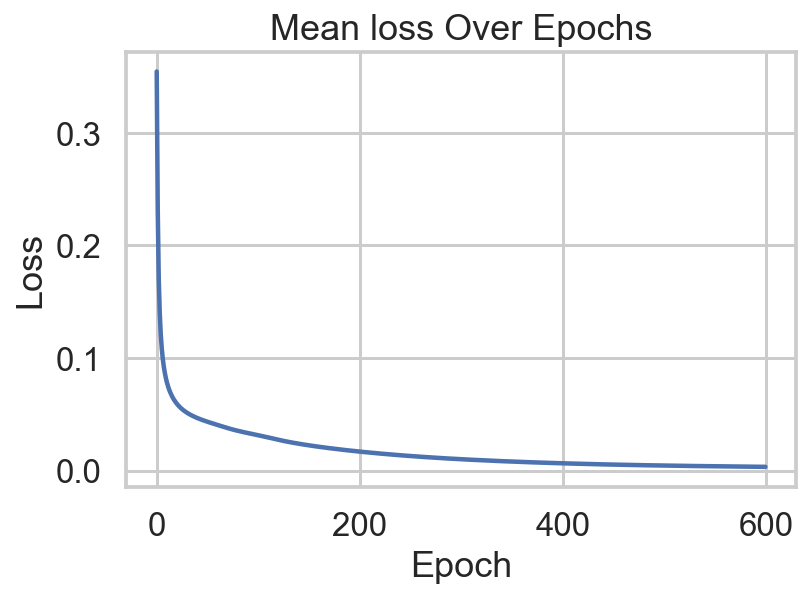

Accuracy on test set: 0.9736842105263158


In [10]:
model=MultiLayerPerceptron(None)
model.fit(X_train,y_train)
model.plot_loss()
accuracy = model.evaluate_accuracy(X_test, y_test)
print("Accuracy on test set:", accuracy)